<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JulioOsvaldoHernandezBucio/blob/main/Semana7_DataAnalysisWithPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Julio Osvaldo Hernandez Bucio. A01794366. Dra. María de la Paz Rico Fernández. Ciencia y Analitica de datos. 27/10/22

# **Model Development**

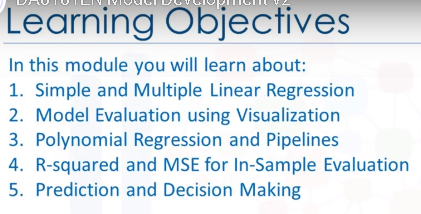

A model or estimator can be thought of as a mathematical equation used to predict a value given one or more other values. Relating one or more independent variables or features to dependent variables.

Usually the more relevant data you have the more accurate your model is.
For example, you input multiple independent variables or features to your model.
Therefore, your model may predict a more accurate price for the car.

# **Linear and Multiple Linear Regression**

Linear Regression will refer to one independent variable to make a prediction.

Multiple Linear Regression will refer to multiple independent variables to make a prediction.

Simple Linear Regression (or SLR) is: A method to help us understand the relationship between two variables: The predictor (independent) variable x, and the target (dependent) variable y.

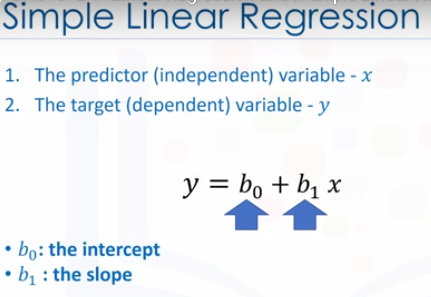

- The parameter b one is the slope When we fit or train the model, we will come
up with these parameters.

Let’s clarify the prediction step. It’s hard to figure out how much a car costs,
but the Highway Miles per Gallon

If we assume, there is a linear relationship between these variables, we can use this relationship to formulate
a model to determine the price of the car. 

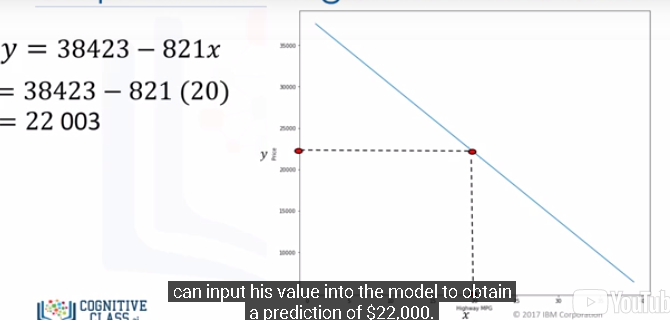

If the Highway Miles per Gallon is 20, we can input his value into the model to obtain a prediction of $22,000.

In order to determine the line, we take data points from our data set marked in red here.

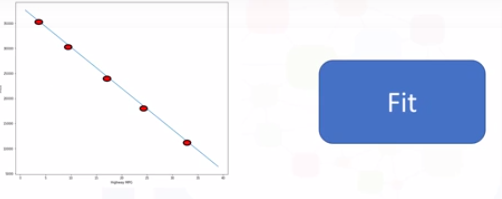

We then use these training points to fit our model; the results of the training points are the parameters. **(b0, b1)**  

We usually store the data points in two dataframe
or numpy arrays.

The value we would like to predict is called the target that we store in the array y, we store the dependent variable in the dataframe or array X. 

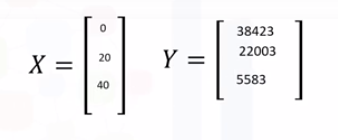

In this model, this uncertainty is taken into account by assuming a small random value is added to the point on the line; this is called noise. 

The figure shows the distribution of the noise. The vertical axis shows the value added and the horizontal axis illustrates the probability that the value will be added. Usually, a small positive value is added.

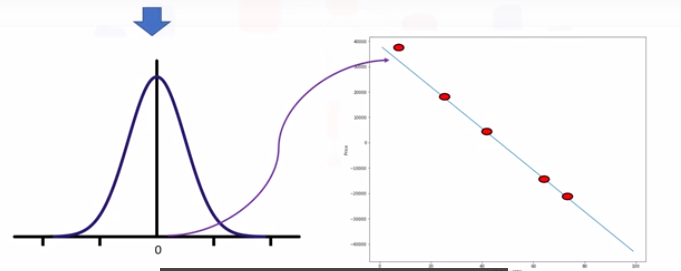

We can summarize the process like this:
- We have a set of training points 
- We use these training points to fit or train the model and get parameters 
- We then use these parameters in the model
- We now have a model; we use the hat on the y to denote the model is an estimate
- We can use this model to predict values that we haven't seen.

To fit the model in Python, first we import linear model from scikit-learn.

In [ ]:
from sklearn.linear_model import LinearRegression

Then Create a Linear Regression Object using the constructor.

In [ ]:
lm = LinearRegression()

We define the predictor variable and target variable. 

In [ ]:
X = df[['highway-mpg']]
Y = df['price']

Then use the method fit to fit the model and find the parameters b0 and b1.

The input are the features and the targets.

In [ ]:
lm.fit(X, Y)

We can obtain a prediction using the method predict.

In [ ]:
Yhat=lm.predict(X)

The output is an array, the array has the same number of samples as the input X.

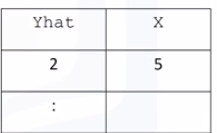

The intercept (b0) is an attribute of the object “lm”.
The slope (b1) is also an attribute of the object “lm”.

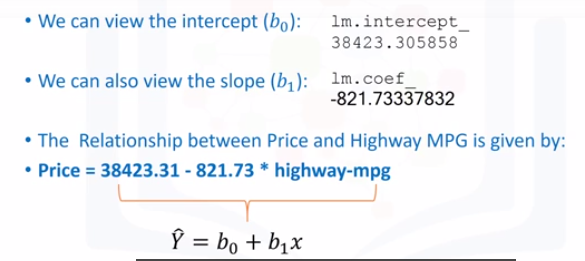

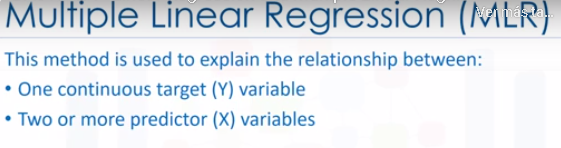

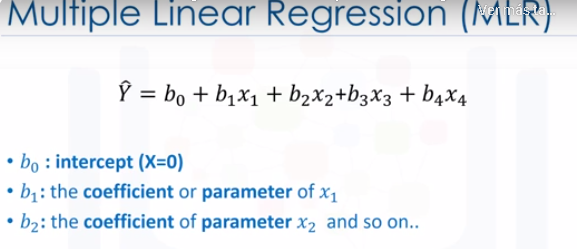

If there are only two variables then we can visualize the values. Consider the following function.

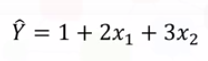

The variables 𝑋1 and 𝑋2 can be visualized on a 2D plane

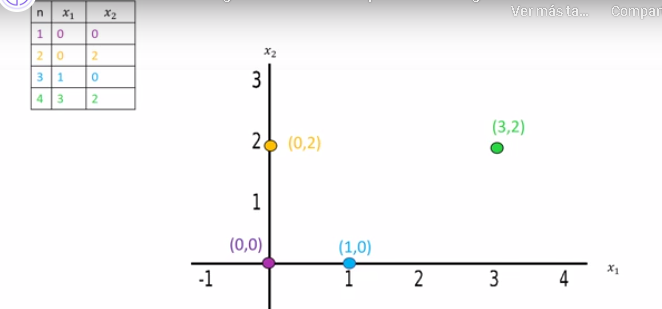

Each value of the predictor variables 𝑋1 and 𝑋2 will be mapped to a new value 𝑌 (y hat) the new values of 𝑌 (y hat) are mapped in the vertical direction with height proportional to the value that yhat takes.

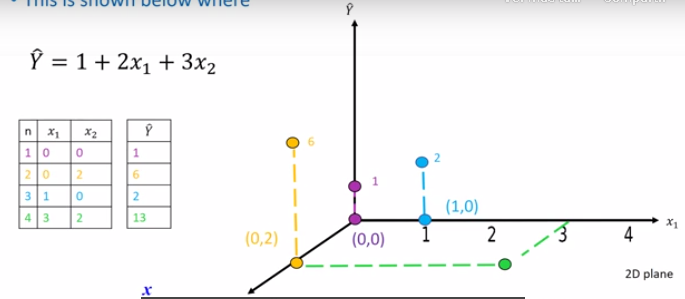

We can fit the Multiple linear regression as follows:

- We can extract the 4 predictor variables and store them in the variable Z.

In [ ]:
Z = df[['horsepower', 'curb-weight', 'enginge-size', 'highway-mpg']]

- Then train the model as before using the method train, with the features or dependent variables and the targets : (colon) 

In [ ]:
lm.fit(Z, df['price'])

We can also obtain a prediction using the method predict.

In [ ]:
Yhat = lm.predict(X)

In this case, the input is an array or dataframe with 4 columns, the number of rows correspond to the number of samples. The output is an array with the same number of elements as number of samples.

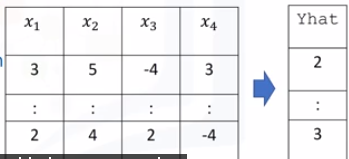

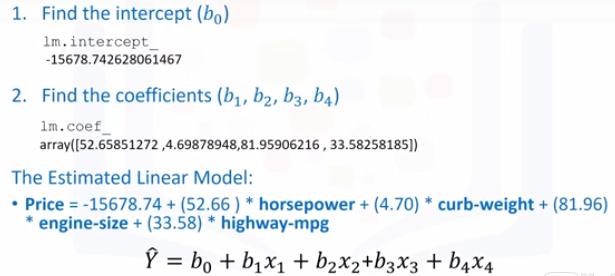

# **Model Evaluation using Visualization**

**Regression Plot**

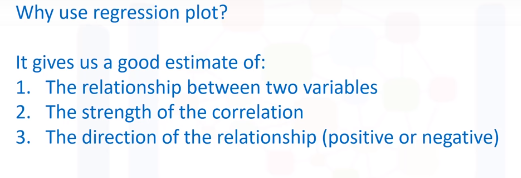

The horizontal axis is the independent variable.

The vertical axis is the dependent variable.

Each point represents a different target point.

The fitted line represents the predicted value.

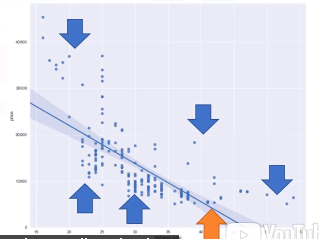

There are several ways to plot a regression plot; a simple way is to use "regplot" from the seaborn library.

First import seaborn.

In [ ]:
import seaborn as sns

Then use the "regplot" function.

The parameter x is the name of the column that contains the dependent variable or feature. The parameter y contains the name of the column that contains the name of the dependent variable or target. The parameter data is the name of the dataframe.

In [ ]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

The result is given by the plot.

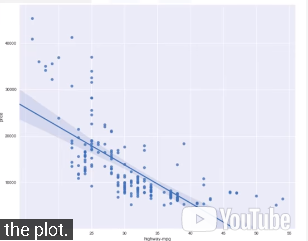

The residual plot represents the error between the actual values.

Examining the predicted value and actual value we see a difference.

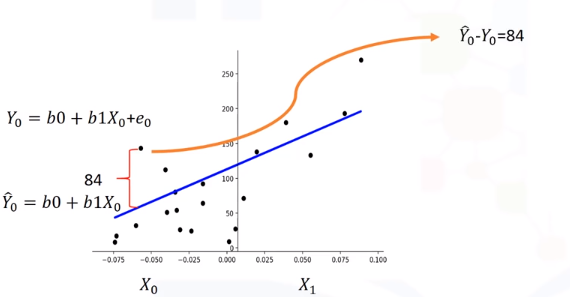

We obtain that value by subtracting the predicted value and the actual target value.

We then plot that value on the vertical axis, with the dependent variable as the horizontal axis.

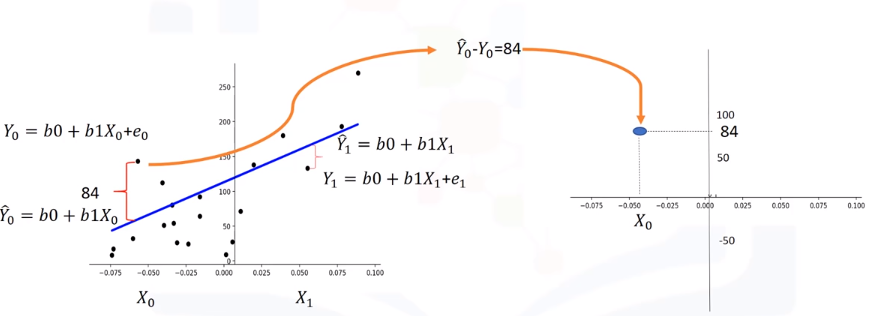

We expect to see the results to have zero mean.

Distributed evenly around the x axis with similar variance; there is no curvature.

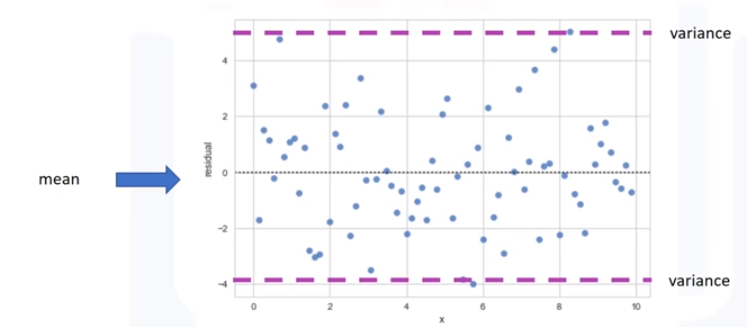

Distributed evenly around the x axis with similar variance; there is no curvature.

This type of residual plot suggests a linear plot is appropriate.

In this residual plot there is curvature, the values of the error change with x.

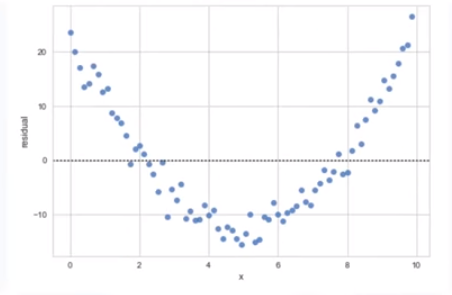

For example, in the region, all the residual errors are positive.

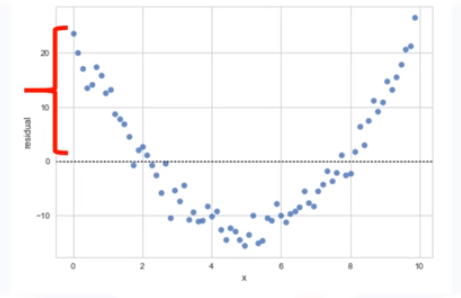

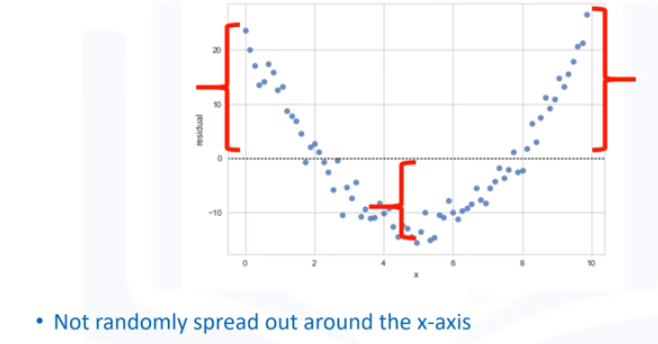

The residuals are not randomly separated; this suggests the linear assumption is incorrect. This plot suggests a non-linear function.

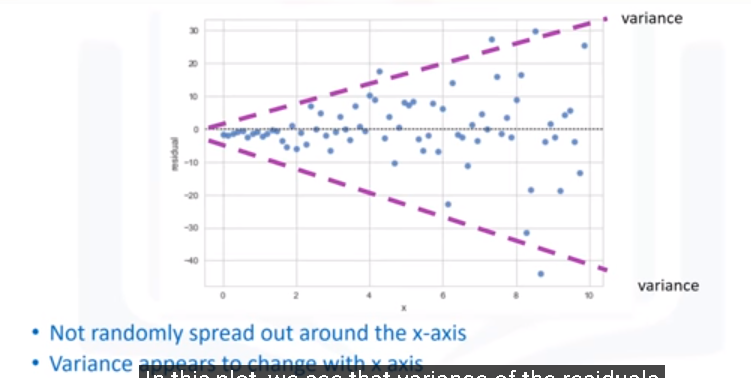

In this plot, we see that variance of the residuals increases with x, therefore our model is incorrect.

We can use seaborn to create a Residual Plot.

First import seaborn.

In [ ]:
import seaborn as sns

We use the “residplot” function.

In [ ]:
sns.residplot(df['highway-mpg'], df['price'])

The first parameter is a series of dependent variable or feature. The second parameter is a Series of dependent variable or target.

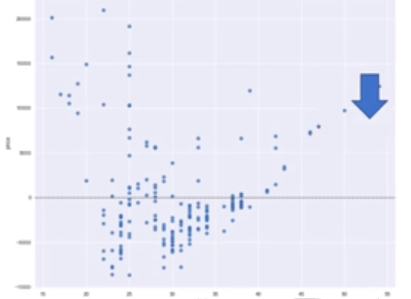

We see in this case the Residuals have a curvature.

A distribution plot counts the predicted value versus the actual value.

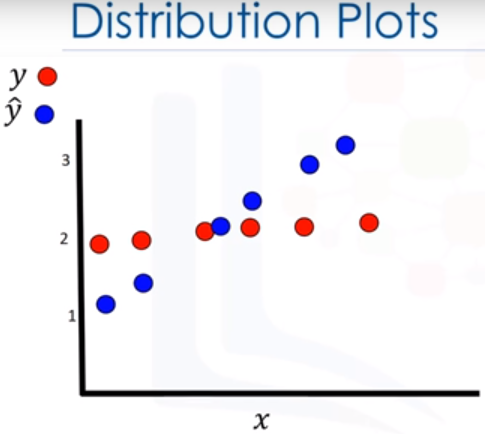

Let's look at a simplified example: - We examine the vertical axis.

- We then count and plot the number of predicted points that are approximately equal to one.

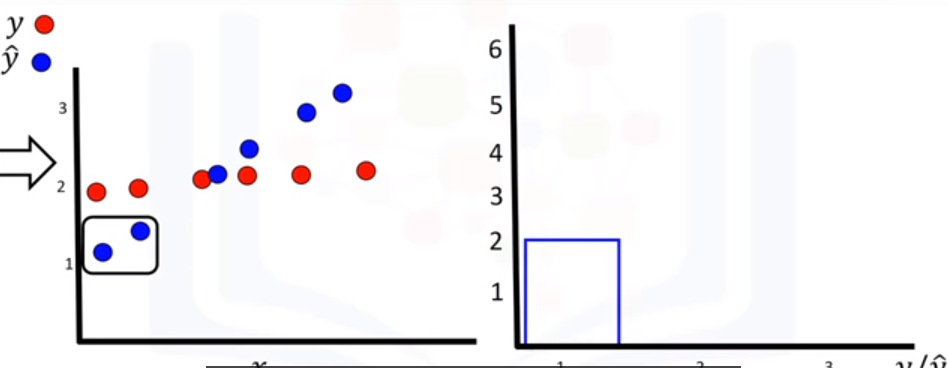

- We repeat the process for every number consecutively

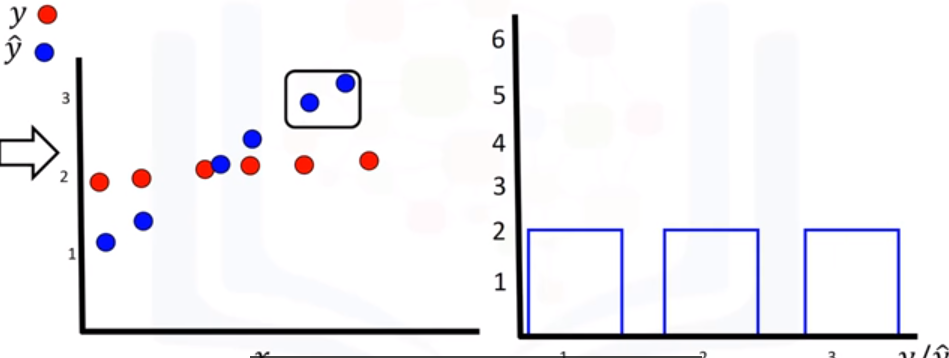

In this case, all the target values are approximately equal to two.
The values of the targets and predicted values are continuous.

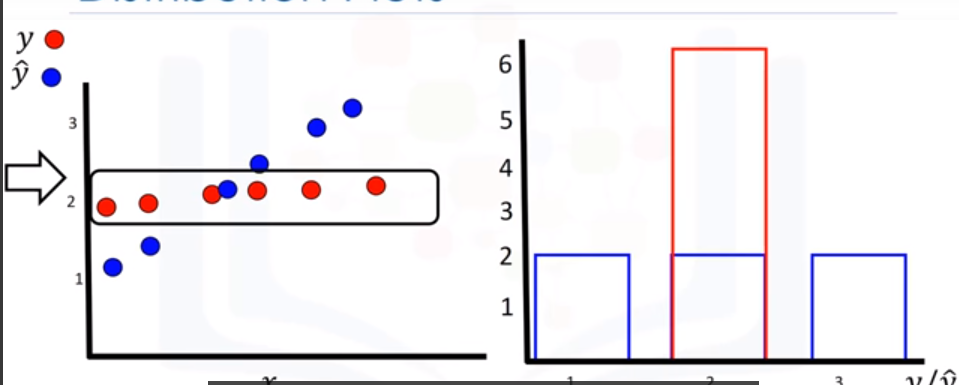

A histogram is for discrete values.

Therefore pandas will convert them to a distribution.

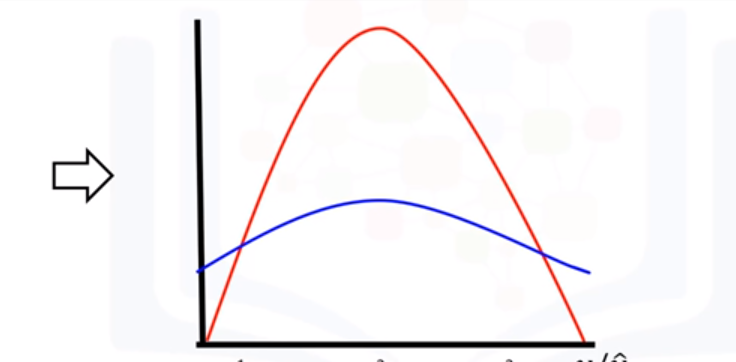

The vertical access is scaled to make the area under the distribution equal to one.

Here is the code to create a Distribution Plot.

In [ ]:
import seaborn as sns

In [ ]:
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")

sns.distplot(Yhat, hist=False, color="b", label="Fitted Values", ax=ax1)

# **Polynomial Regression and Pipelines**

What do we do when a linear model is not the best fit for our data? We Transform our data into a polynomial, then use linear regression to fit the parameter.

Pipelines are a way to simplify your code.

Polynomial regression is a special case of the general linear regression. This method is beneficial for describing curvilinear relationships.

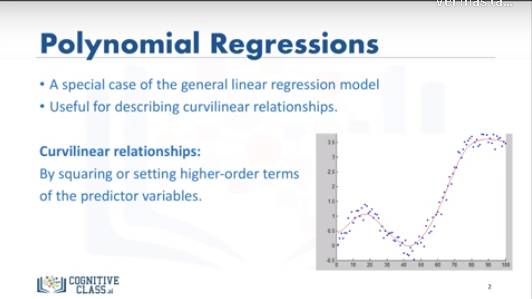

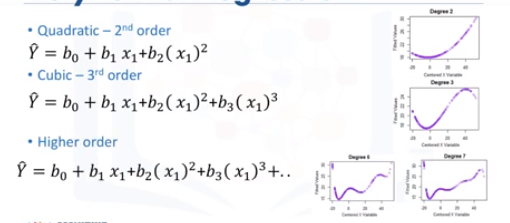

1.Calculate Polynomial of 3rd Order

In Python, we do this by using the polyfit() function.

In [ ]:
f = np.polyfit(x,y,3)
p=np.polyld(f)

We can print out the model.

In [ ]:
print(p)

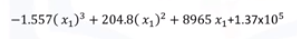

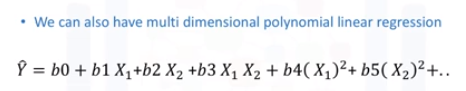

Numpy’s “polyfit” function cannot perform this type of regression.

We use the "preprocessing" library in sci-kit-learn, to create a polynomial feature object.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

The constructor takes the degree of the polynomial as a parameter.

In [ ]:
pr = PolynomialFeatures(degree=2, include_bias=False)

Then we transform the features into a polynomial feature with the “fit_transform” method.

In [ ]:
x_polly = pr.fit_transform(x[['horsepower', 'curb-weight']])

Let's do a more intuitive example. Consider the features shown here.

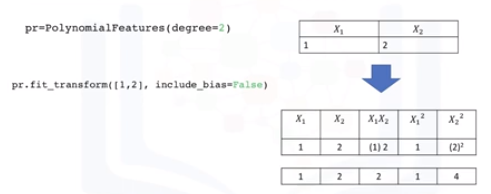

Applying the method, we transform the data We now have a new set of features that are a transformed version of our original features.

**Pre-processing**

As the dimension of the data gets larger we may want to normalize multiple features in scikit-learn, instead, we can use the preprocessing module to simplify many tasks.

We import “StandardScaler” We train the object, fit the scale object;
then transform the data into a new dataframe on array “x_scale”.

In [ ]:
from sklearn.preprocessing import StandardScaler

SCALE = StandardScaler()
SCALE.fit(x_data[['horsepower', 'curb-weight']])

then transform the data into a new dataframe on array “x_scale”.

In [ ]:
x_scale = SCALE.transform(x_data[['horsepower', 'curb-weight']])

**Pipelines**

We can simplify our code by using a pipeline library.

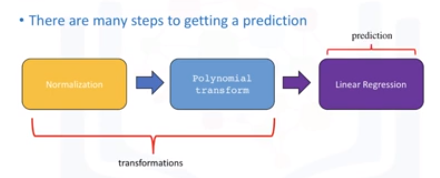

We simplify the process using a pipeline. Pipelines sequentially perform a series of transformation.

We import the library Pipeline.

In [ ]:
from sklearn.pipeline import Pipeline

We create a list of tuples, the first element in the tuple contains the name of the estimator: model. The second element contain model constructor. We input the list in the pipeline constructor.

In [ ]:
Input=[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('model', LinearRegression())]

We now have a pipeline object.

We can train the pipeline by applying the train method to the Pipeline object.

In [ ]:
Pipe.train(X['horsepower', 'curb-weight', 'engine-size', 'highway-mpg'], y)

We can also produce a prediction as well.

In [ ]:
yhat = Pipe.predict(X[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

The method normalizes the data, performs a polynomial transform, then outputs a prediction.

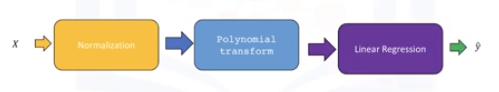

# **Measures for In-Sample Evaluation**

Now that we’ve seen how we can evaluate a model by using visualization, we want to numerically evaluate our models.

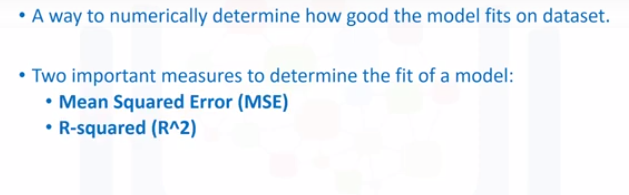

To measure the MSE, we find the difference between the actual value y and the predicted value yhat then square it.

In this case, the actual value is 150; the predicted value is 50. Subtracting these points we get 100.

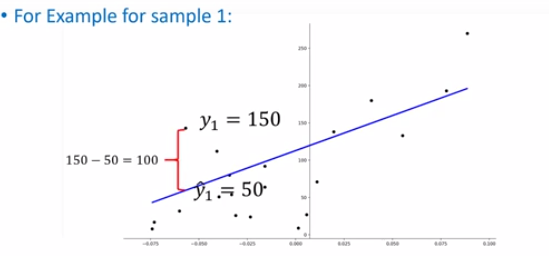

We then square the number.

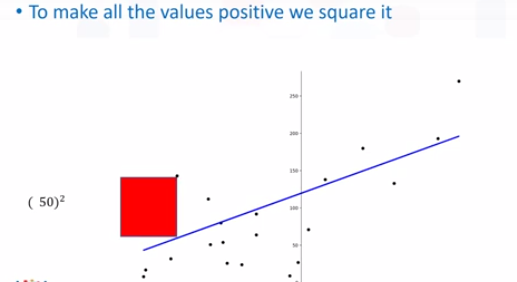

We then take the Mean or average of all the errors by adding then all together and dividing by the number of samples

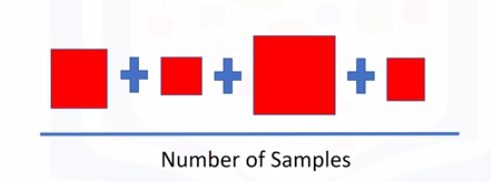

To find the MSE in Python, we can import the “mean_Squared_error()” from“scikit-learn.metrics”.

In [ ]:
from sklearn.metrics import mean_squared_error

The “mean_Squared_error()” function gets two inputs: the actual value of target variable and the predicted value of target variable.

In [ ]:
mean_squared_error(df['price'], Y_predict_simple_fit)

**R-squared**

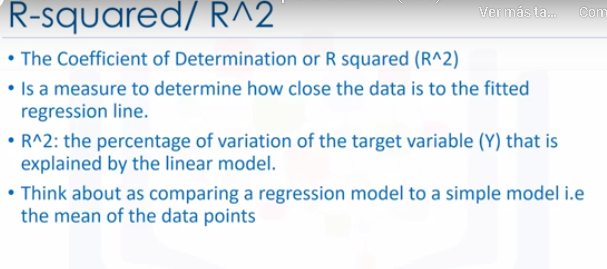

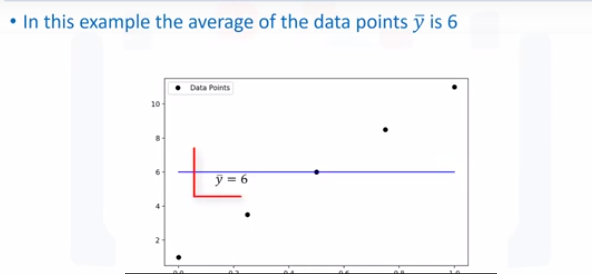

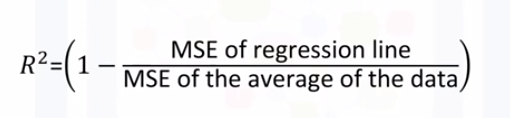

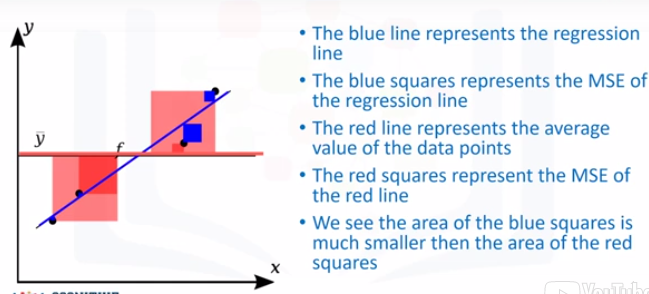

If we Plug in this value from the previous slide for R^2, we get a value near one, this means the line is a good fit for the data. 

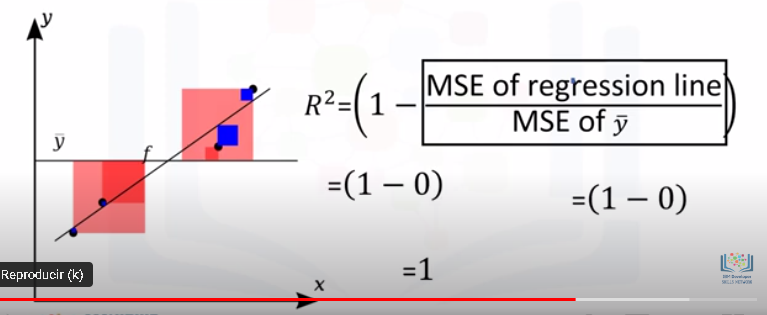

Here is an example of a line that does not fit the data well.

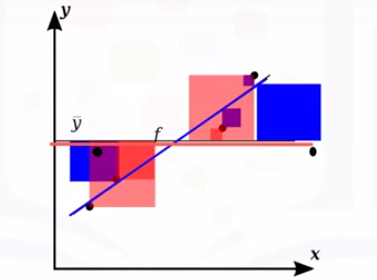

If we just examine the area of the red squares compared to the blue squares, we see the area is almost identical. The ratio of the areas is close to one.

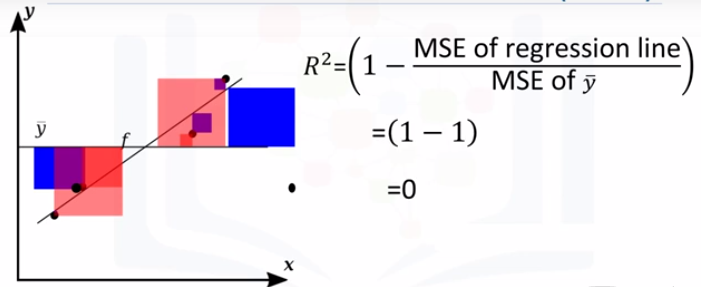

In this case the R^2 is near zero.

We find the R-squared value in Python by using the score() method, in the linear regression object.

In [ ]:
X = df[['highway-mpg']]
Y = df['price']

lm.fit(X,Y)

lm.score(X,Y)

# **Prediction and Decision Making**

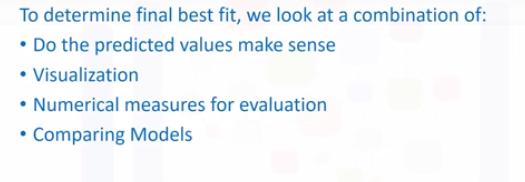

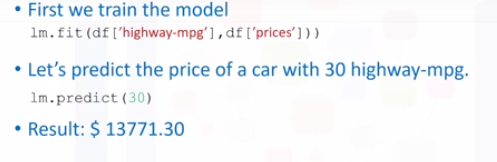

Sometimes your model will produce values that don't make sense, for example, if we plot the model out for highway-mpg, in the ranges of 0 to 100, we get negative values for the price.

This could be because the values in that range are not realistic, the linear assumption is incorrect, or we don't have data for cars in that range.

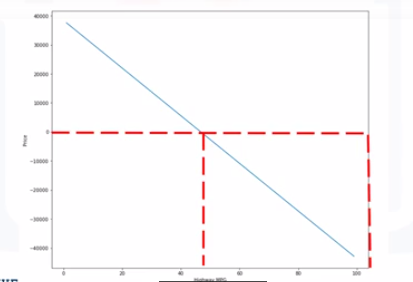

In this case, it is unlikely that a car will have fuel mileage in that range, so our model seems valid.

To generate a sequence of values in a specified range, import numpy, then use the numpy "arrange" function to generate the sequence.

In [ ]:
import numpy as np

new_input = np.arrange(1,101,1).reshape(-1,1)

The first parameter is the starting point of the sequence.
The second parameter is the end point plus one of the sequence.
The final parameter is the step size between elements in the sequence.

We can use the output to predict new values; the output is a numpy array.

In [ ]:
yhat = lm.predict(new_input)

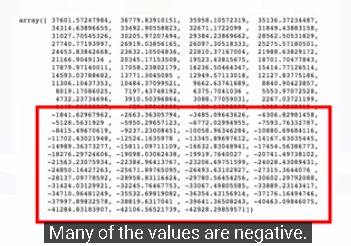

Using a regression plot to visualize your data is the first method you should try.

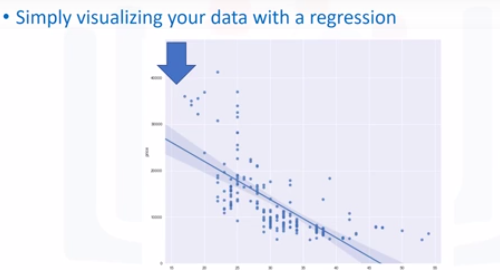

Examining the Residual Plot We see in this case the Residuals have a curvature
suggesting non-linear behavior.

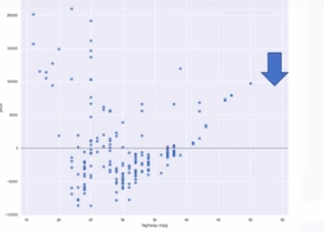

A distribution plot, is a good method for Multiple Linear Regression.

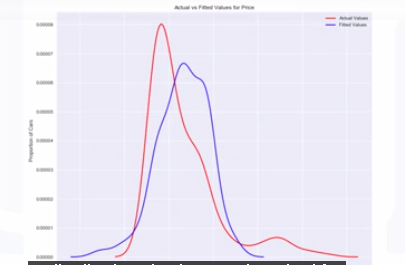

For example: We see the predicted values for prices in
the range from $3,0000 to $50,000 are inaccurate This suggests a non-linear model may be more suitable or we need more data in this range.

Let’s see how different measures of Mean square error impact
the model.

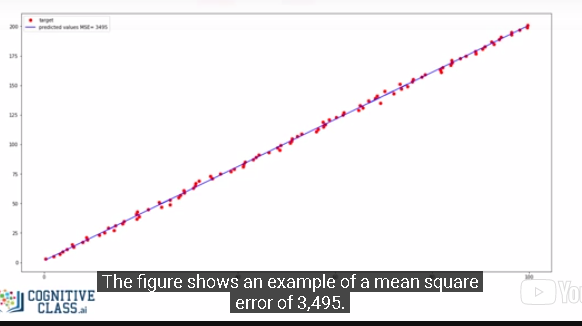

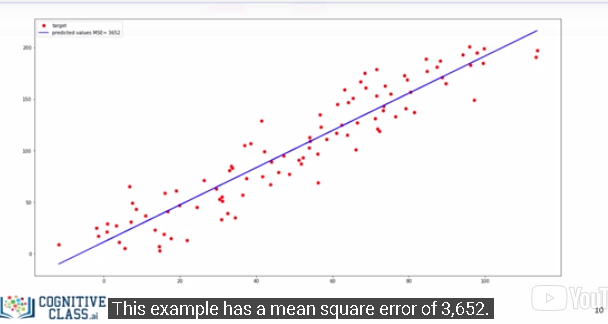

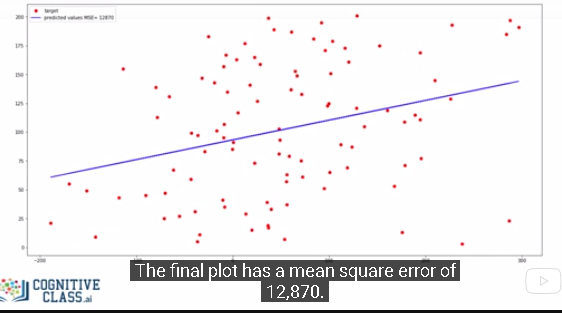

As the square error increases, the targets get further from the predicted points.

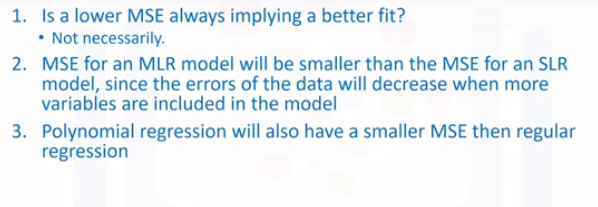

# **Lab 4**

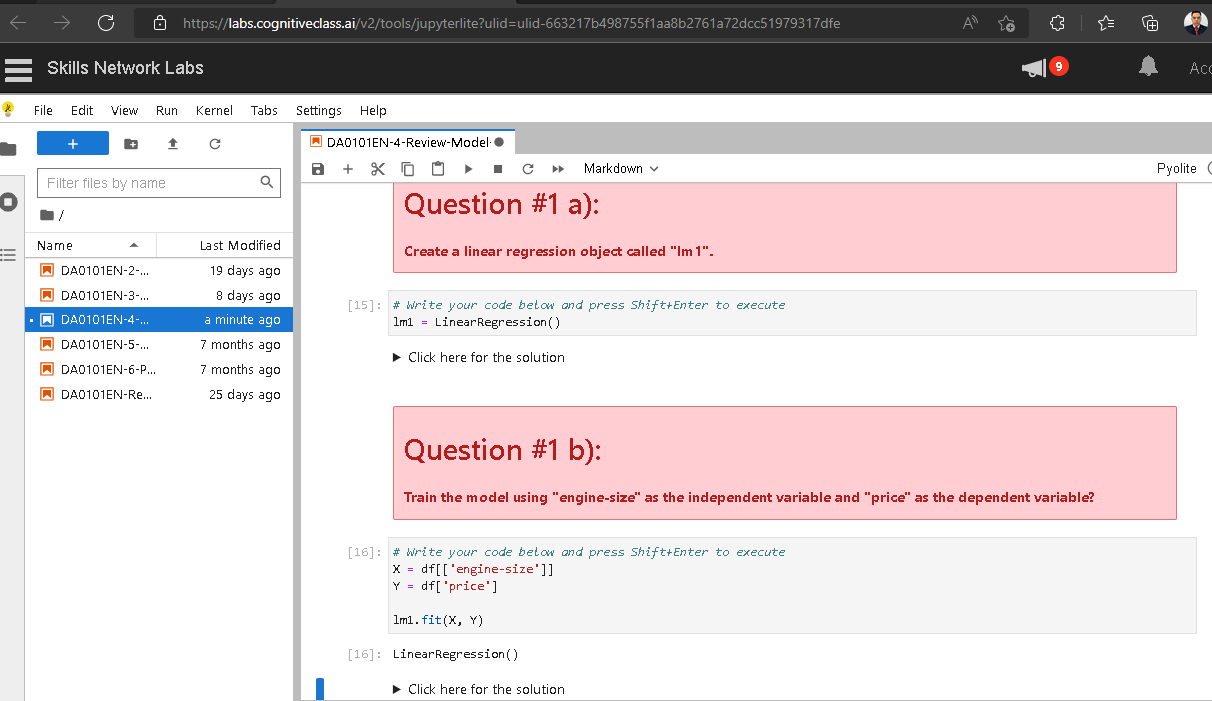

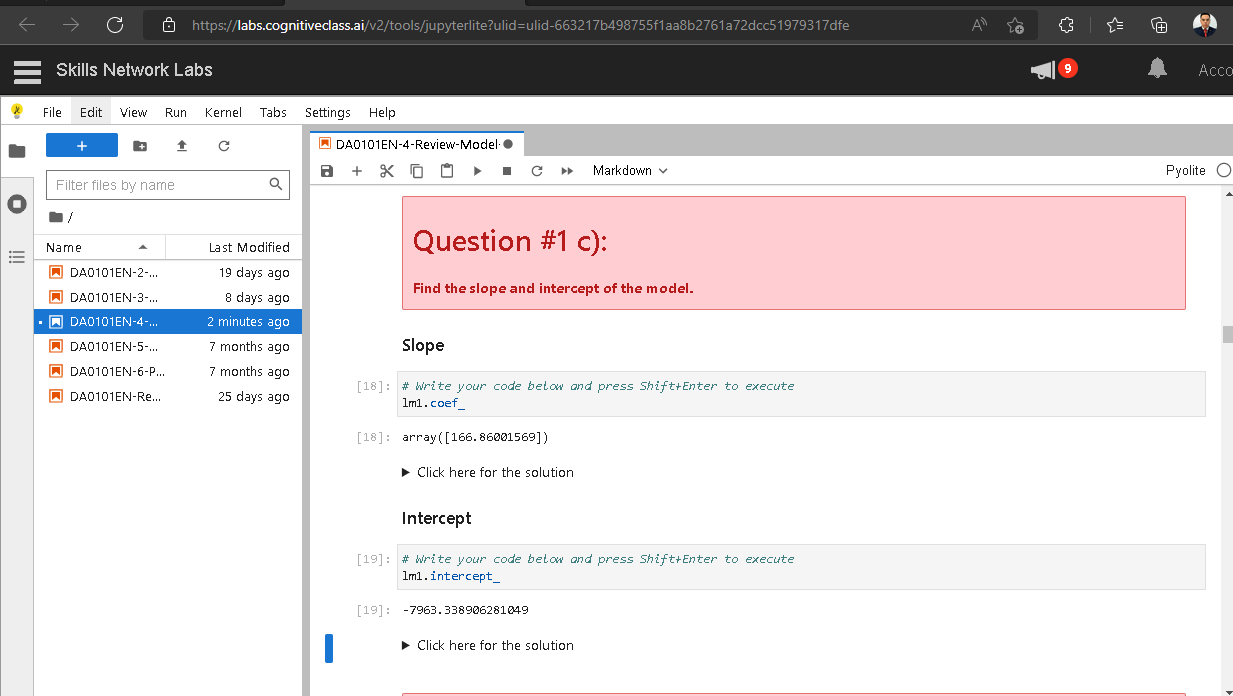

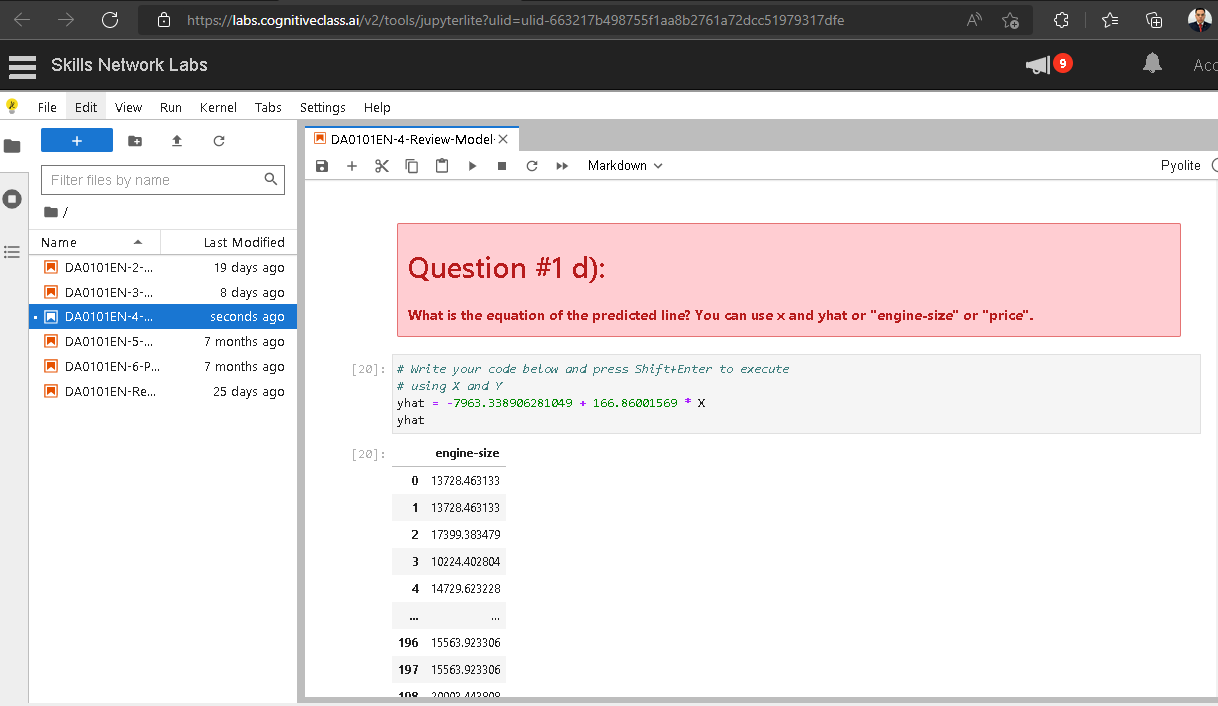

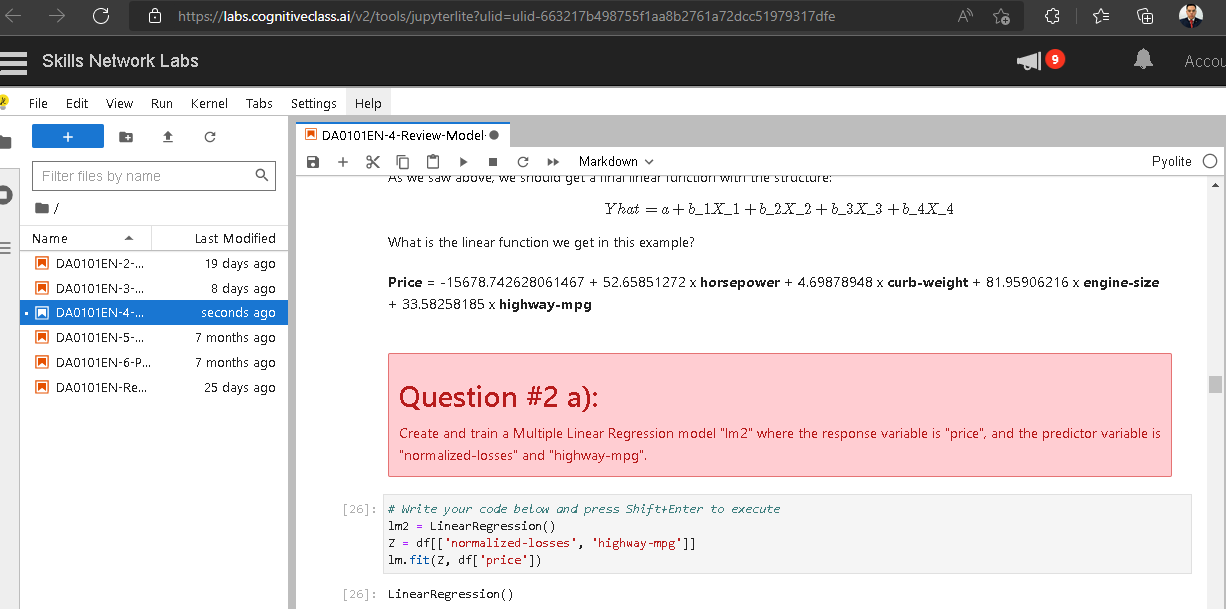

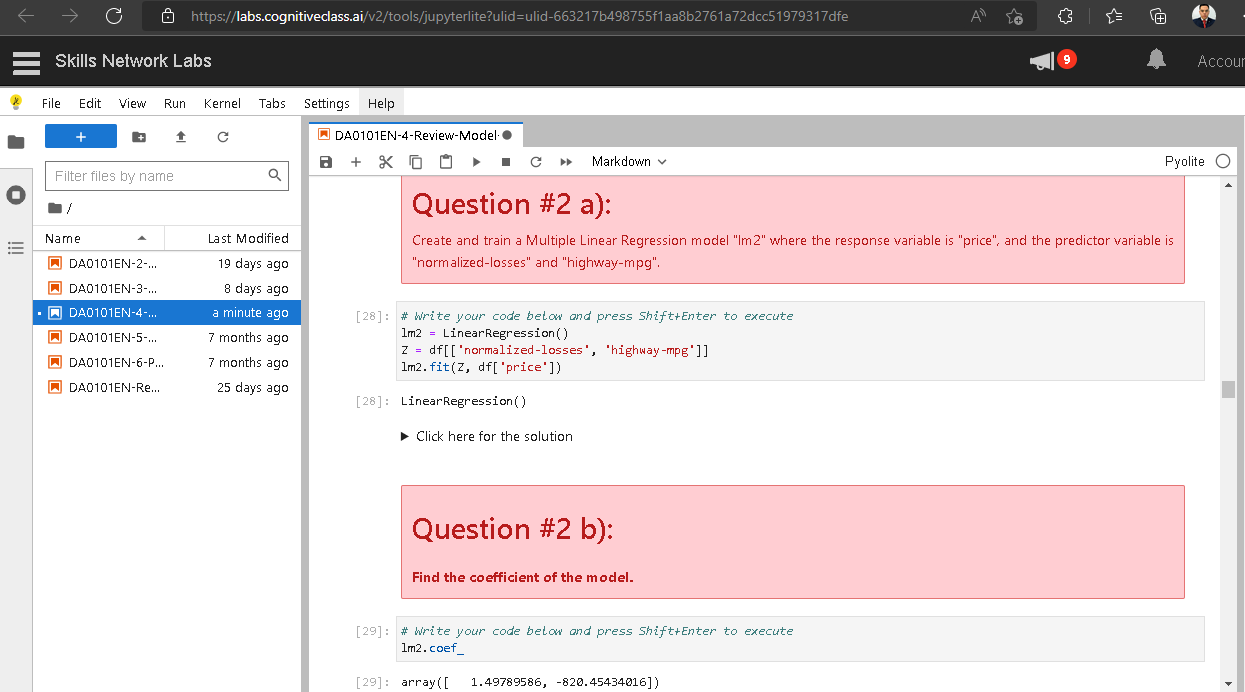

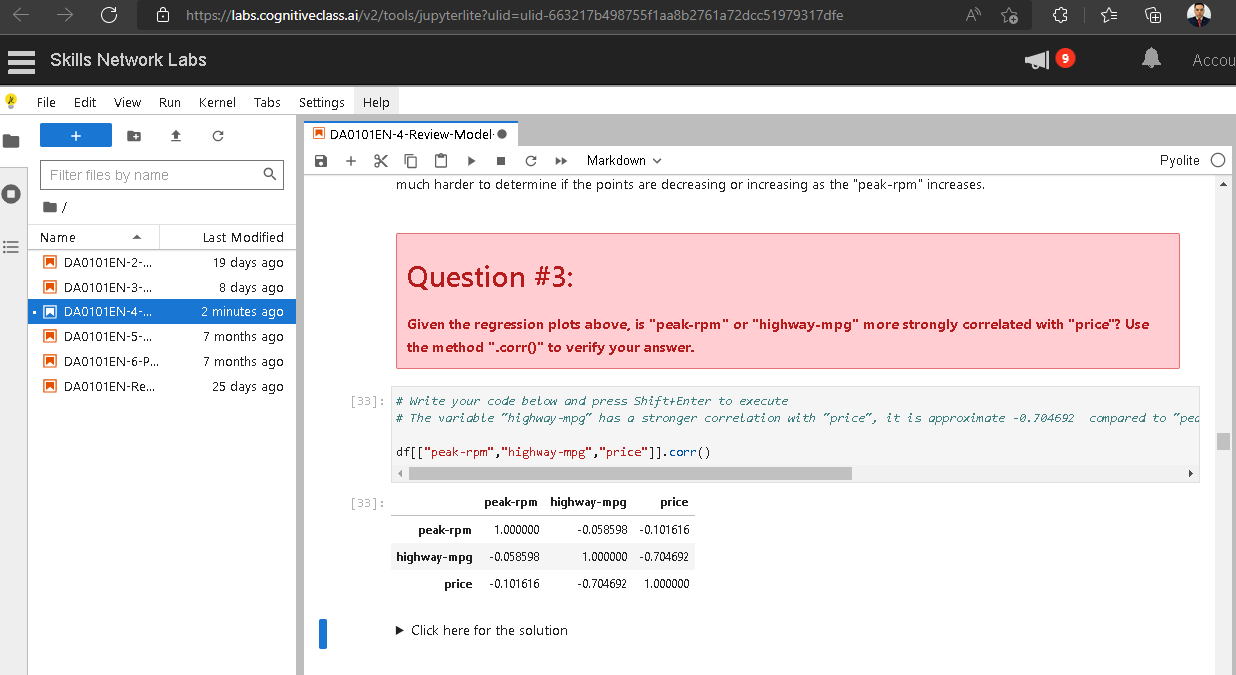

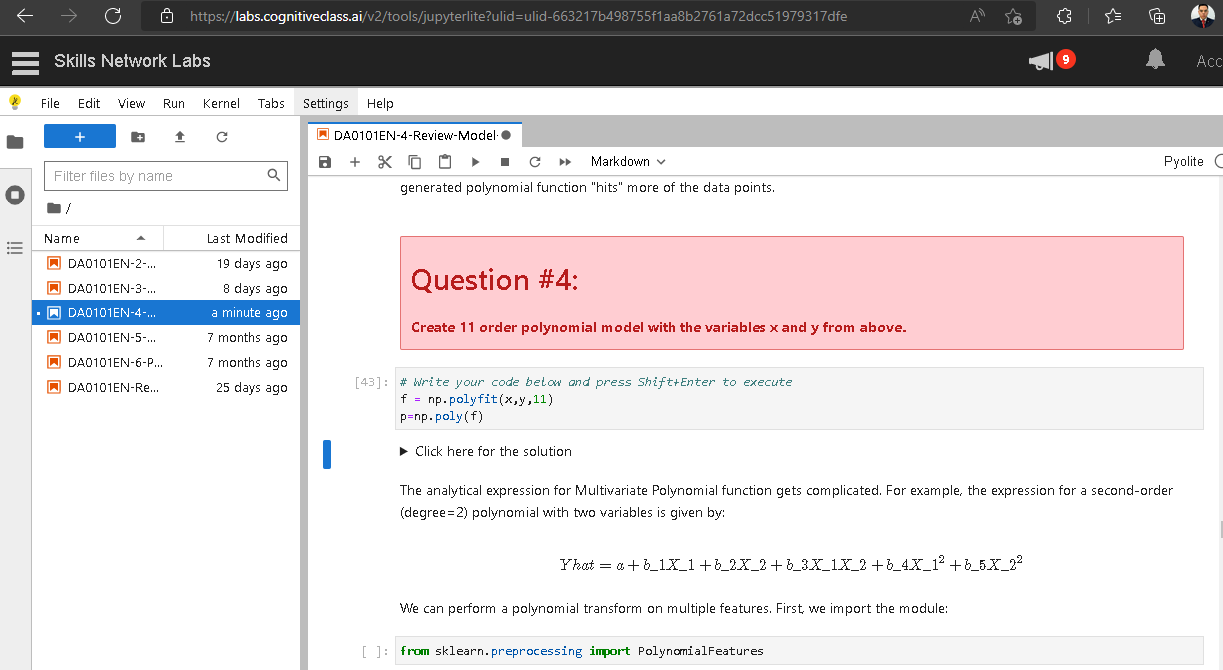

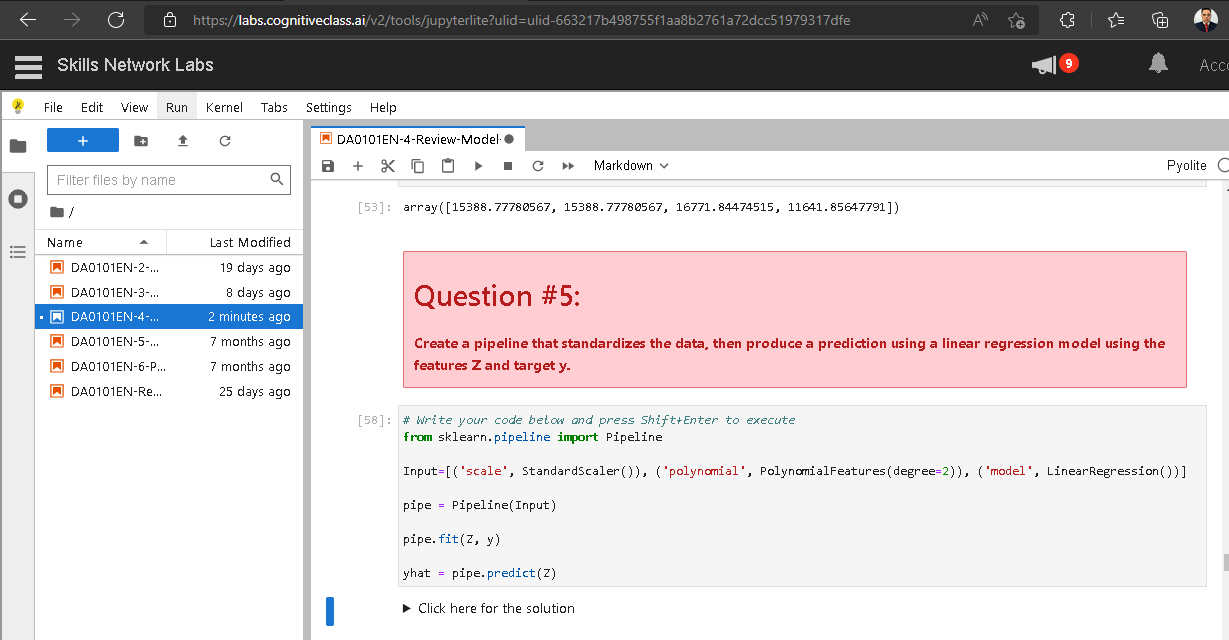

# **Graded Review Questions**

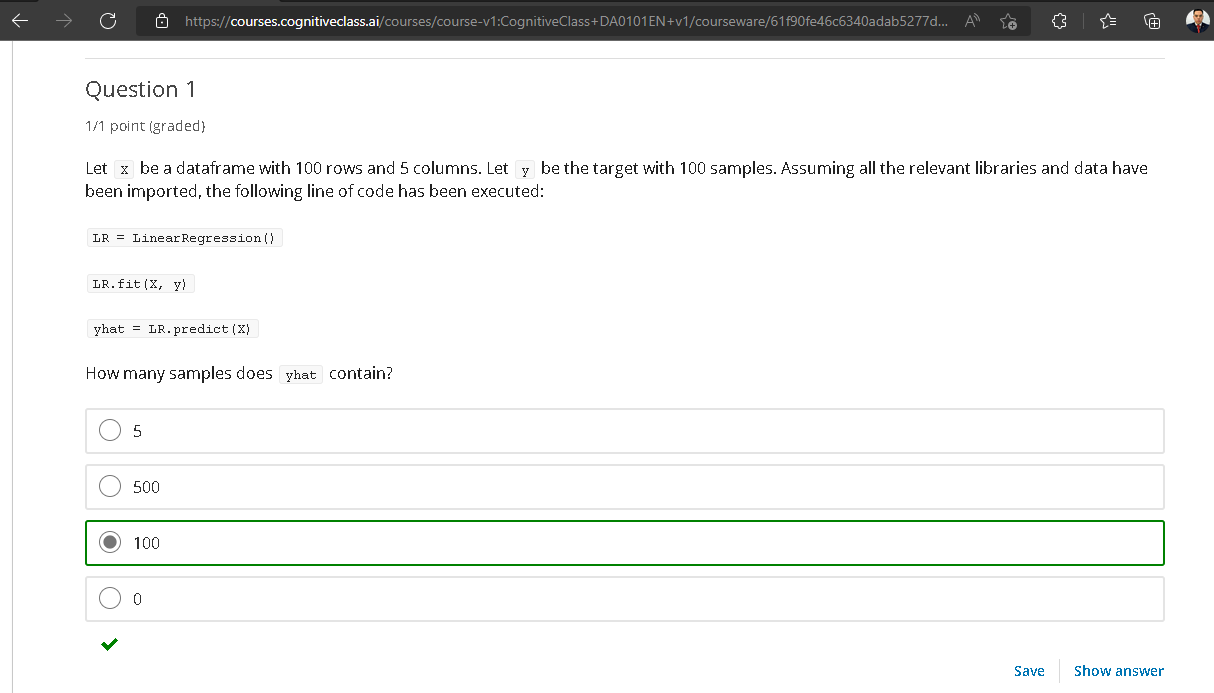

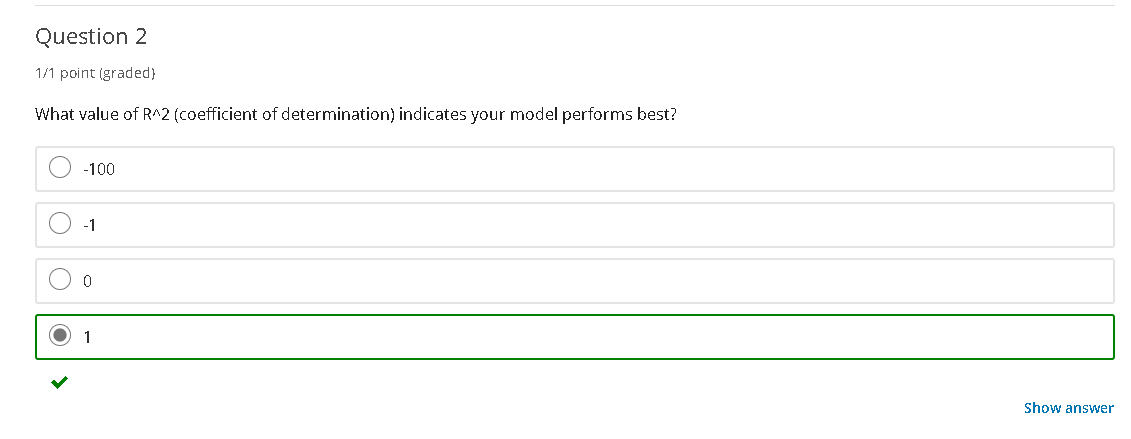

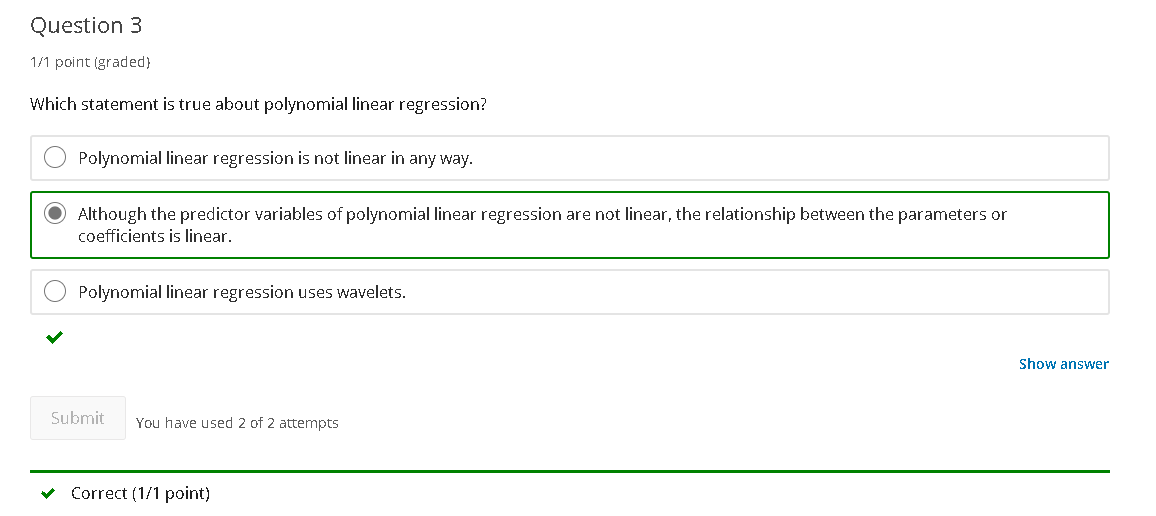

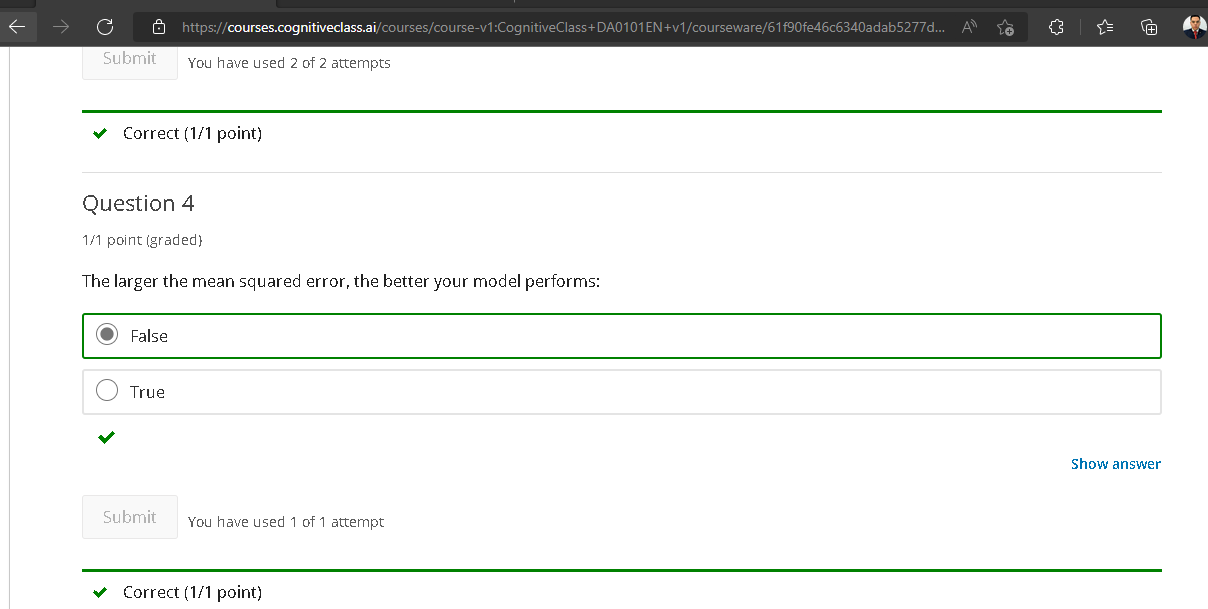

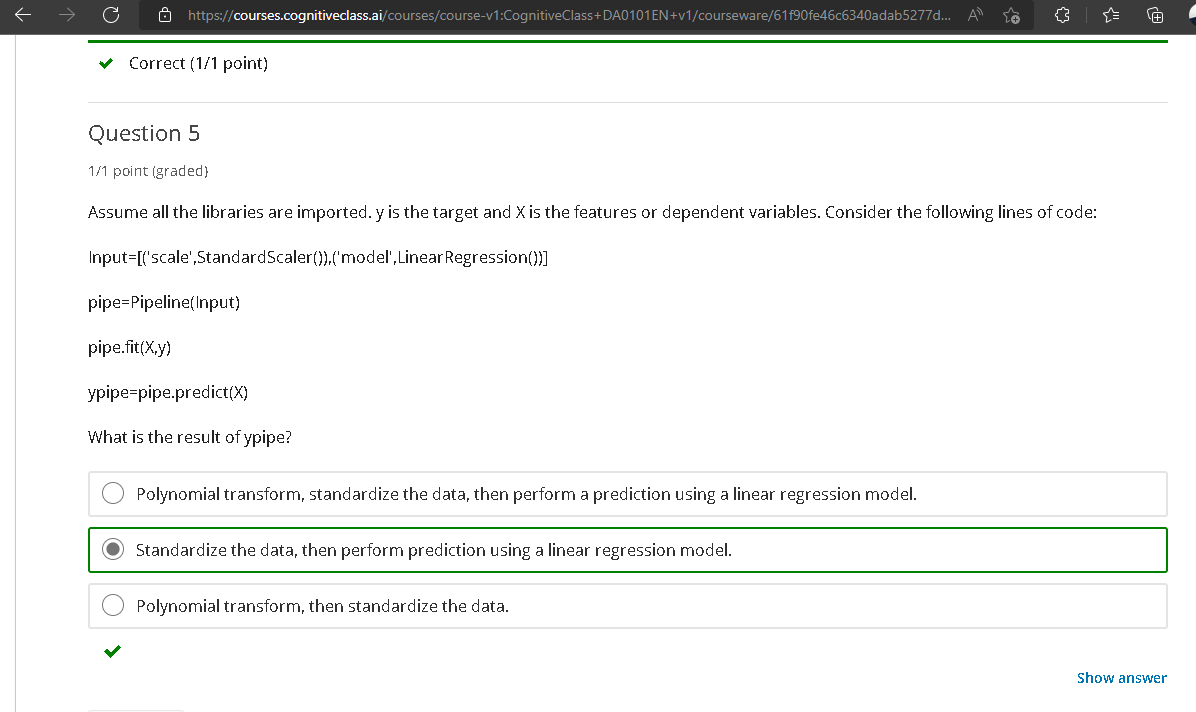